In [71]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date, datetime

In [72]:
# Импорт данных и приведение типов, отмененные рейсы исключаем из анализа
df = pd.read_csv('2008.csv', parse_dates=[['Year', 'Month', 'DayofMonth']])
df.rename(columns={'Year_Month_DayofMonth': 'Date'}, inplace = True)
pd.options.mode.chained_assignment = None
#cancelled = df[df['DepTime'].isnull()]

df = df[df['Cancelled'] == 0]
df = df[df['Diverted'] == 0]

df['DepTime'] = df['DepTime'].apply(int)
df['Hours'] = (df.DepTime - df.DepTime % 100) // 100
df['Minutes'] = df.DepTime % 100
df['Time'] = df['Hours'].map(str) + ':' + df['Minutes'].map(str) + ':00'
df['DepTime'] = pd.to_timedelta(df['Time'], unit = 'm')

df['CRSDepTime'] = df['CRSDepTime'].apply(int)
df['Hours'] = (df.CRSDepTime - df.CRSDepTime % 100) // 100
df['Minutes'] = df.CRSDepTime % 100
df['Time'] = df['Hours'].map(str) + ':' + df['Minutes'].map(str) + ':00'
df['CRSDepTime'] = pd.to_timedelta(df['Time'])

df['ArrTime'] = df['ArrTime'].apply(int)
df['Hours'] = (df.ArrTime - df.ArrTime % 100) // 100
df['Minutes'] = df.ArrTime % 100
df['Time'] = df['Hours'].map(str) + ':' + df['Minutes'].map(str) + ':00'
df['ArrTime'] = pd.to_timedelta(df['Time'])

df['CRSArrTime'] = df['CRSArrTime'].apply(int)
df['Hours'] = (df.CRSArrTime - df.CRSArrTime % 100) // 100
df['Minutes'] = df.CRSArrTime % 100
df['Time'] = df['Hours'].map(str) + ':' + df['Minutes'].map(str) + ':00'
df['CRSArrTime'] = pd.to_timedelta(df['Time'])
df.drop(['Hours', 'Minutes','Time'], axis = 1, inplace = True)
pd.options.mode.chained_assignment = 'warn'

In [73]:
cutted_df = df.drop(['CRSDepTime', 'CRSArrTime', 'CRSElapsedTime','FlightNum', 'Cancelled', 'CancellationCode', 'ArrDelay', 'DepDelay', 'Diverted', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'], axis = 1)
cutted_df.set_index('Date')

,DayOfWeek,DepTime,ArrTime,UniqueCarrier,TailNum,ActualElapsedTime,AirTime,Origin,Dest,Distance,TaxiIn,TaxiOut
Date,,,,,,,,,,,,
2008-06-18,3,21:11:00,23:08:00,WN,N699SW,57.0,46.0,MDW,CLE,307,3.0,8.0
2008-06-04,3,14:26:00,17:30:00,XE,N15980,124.0,108.0,IAH,AVL,834,4.0,12.0
2008-08-03,7,11:43:00,15:01:00,WN,N464WN,138.0,125.0,MDW,TPA,997,4.0,9.0
2008-01-23,3,11:41:00,13:23:00,OO,N465SW,102.0,79.0,SLC,FCA,532,4.0,19.0
2008-05-04,7,08:15:00,12:43:00,WN,N489WN,148.0,136.0,LAS,AUS,1090,4.0,8.0
2008-01-03,4,13:49:00,16:40:00,B6,N640JB,171.0,153.0,PBI,JFK,1028,5.0,13.0
2008-03-31,1,13:59:00,14:13:00,WN,N387SW,74.0,55.0,ABQ,PHX,328,5.0,14.0
2008-04-22,2,18:15:00,20:57:00,DL,N3765,342.0,302.0,JFK,LAS,2248,9.0,31.0
2008-03-04,2,06:26:00,08:20:00,WN,N633SW,174.0,164.0,MCO,MCI,1072,4.0,6.0


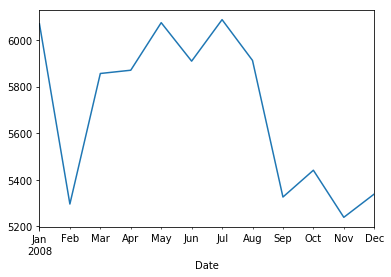

In [74]:
months = cutted_df.groupby(pd.Grouper(key='Date', freq='M')).agg({'Distance':['count']})
months.plot(legend = None)
plt.show()

DayOfWeek
1    5342
2    5044
3    5117
4    5241
5    5201
6    4467
7    5145
Name: Distance, dtype: int64


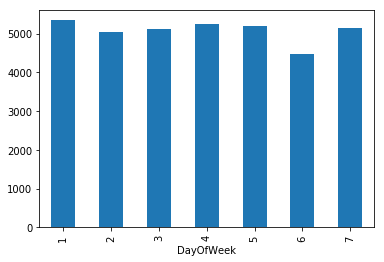

In [91]:
mar_aug = cutted_df[(cutted_df['Date'] > '2008-03-01') & (cutted_df['Date'] < '2008-09-01')]
days = mar_aug.groupby('DayOfWeek').count()
print(days['Distance'])
days['Distance'].plot(kind = 'bar',legend = None)
plt.show()

In [92]:
cutted_df.describe()

,DayOfWeek,DepTime,ArrTime,ActualElapsedTime,AirTime,Distance,TaxiIn,TaxiOut
count,68418.000000,68418,68418,68418.000000,68418.000000,68418.000000,68418.000000,68418.000000
mean,3.924084,0 days 13:30:28.641585,0 days 14:59:00.062264,126.960931,103.689628,726.908884,6.847335,16.423967
std,1.995448,0 days 04:46:04.749090,0 days 05:02:49.665825,70.382109,67.709908,566.826330,4.884815,11.227598
min,1.000000,0 days 00:01:00,0 days 00:01:00,19.000000,3.000000,31.000000,0.000000,0.000000
25%,2.000000,0 days 09:28:00,0 days 11:06:00,76.000000,55.000000,325.000000,4.000000,10.000000
50%,4.000000,0 days 13:23:00,0 days 15:10:00,109.000000,85.000000,576.000000,6.000000,14.000000
75%,6.000000,0 days 17:25:00,0 days 19:06:00,156.000000,132.000000,952.000000,8.000000,19.000000
max,7.000000,1 days 00:00:00,1 days 00:00:00,686.000000,645.000000,4962.000000,165.000000,305.000000
